# Prediction using Decision Tree Algorithm

# Author: T Anas Ahmed

https://www.linkedin.com/in/t-anas-ahmed-thirukulacheri-70b440154/

TASK :- To create a Decision Tree Classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
%matplotlib inline

print('Import Successful')

Import Successful


# Importing The Dataset

In [2]:
iris=datasets.load_iris()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target           #it shows the classes in which the data is divided

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.DESCR      #Gives Data Description

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Creating Dataframe

In [7]:
X = pd.DataFrame(iris.data)
X.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]

Y = pd.DataFrame(iris.target)
Y.columns = ['Species']

df = pd.concat([X,Y],axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
colormap = np.array(['red', 'green', 'black'])

C:\Users\anasa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Petal')

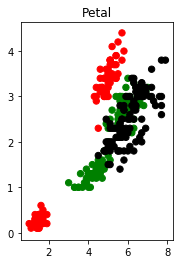

In [9]:

#plot sepal
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[Y.Species], s=40)
plt.title('Sepal')

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[Y.Species], s=40)
plt.title('Petal')

# Splitting the Data into Train and Test

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10) 

# Training the Algorithm

In [11]:
model_DecisionTree = DecisionTreeClassifier(criterion='gini', random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

In [12]:
colname = df.columns
print(list(zip(colname,model_DecisionTree.feature_importances_)))

[('Sepal_Length', 0.0), ('Sepal_Width', 0.014297385620915034), ('Petal_Length', 0.053115090393711525), ('Petal_Width', 0.9325875239853735)]


Feature Importance shows us the features that are important by assigning weightage to them. We can again build the model by taking into account only those features that has high feature importance values. This is a very important step considering if inplace of iris dataset, if we had any other dataset that had 100's of features and many records then in such cases reducing the features becomes very important because training Decision Trees classifiers is computationally very expensive and thus it becomes very crucial to use only those variable that are important.

In [13]:
Y_pred = model_DecisionTree.predict(X_test)

print("Confusion Matrix : ")
print(confusion_matrix(Y_test,Y_pred))
print("Classification Report : ")
print(classification_report(Y_test,Y_pred))
print("Accuracy of the Model is : ", accuracy_score(Y_test, Y_pred))


Confusion Matrix : 
[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of the Model is :  0.9777777777777777


# Visualizing the Decision Tree

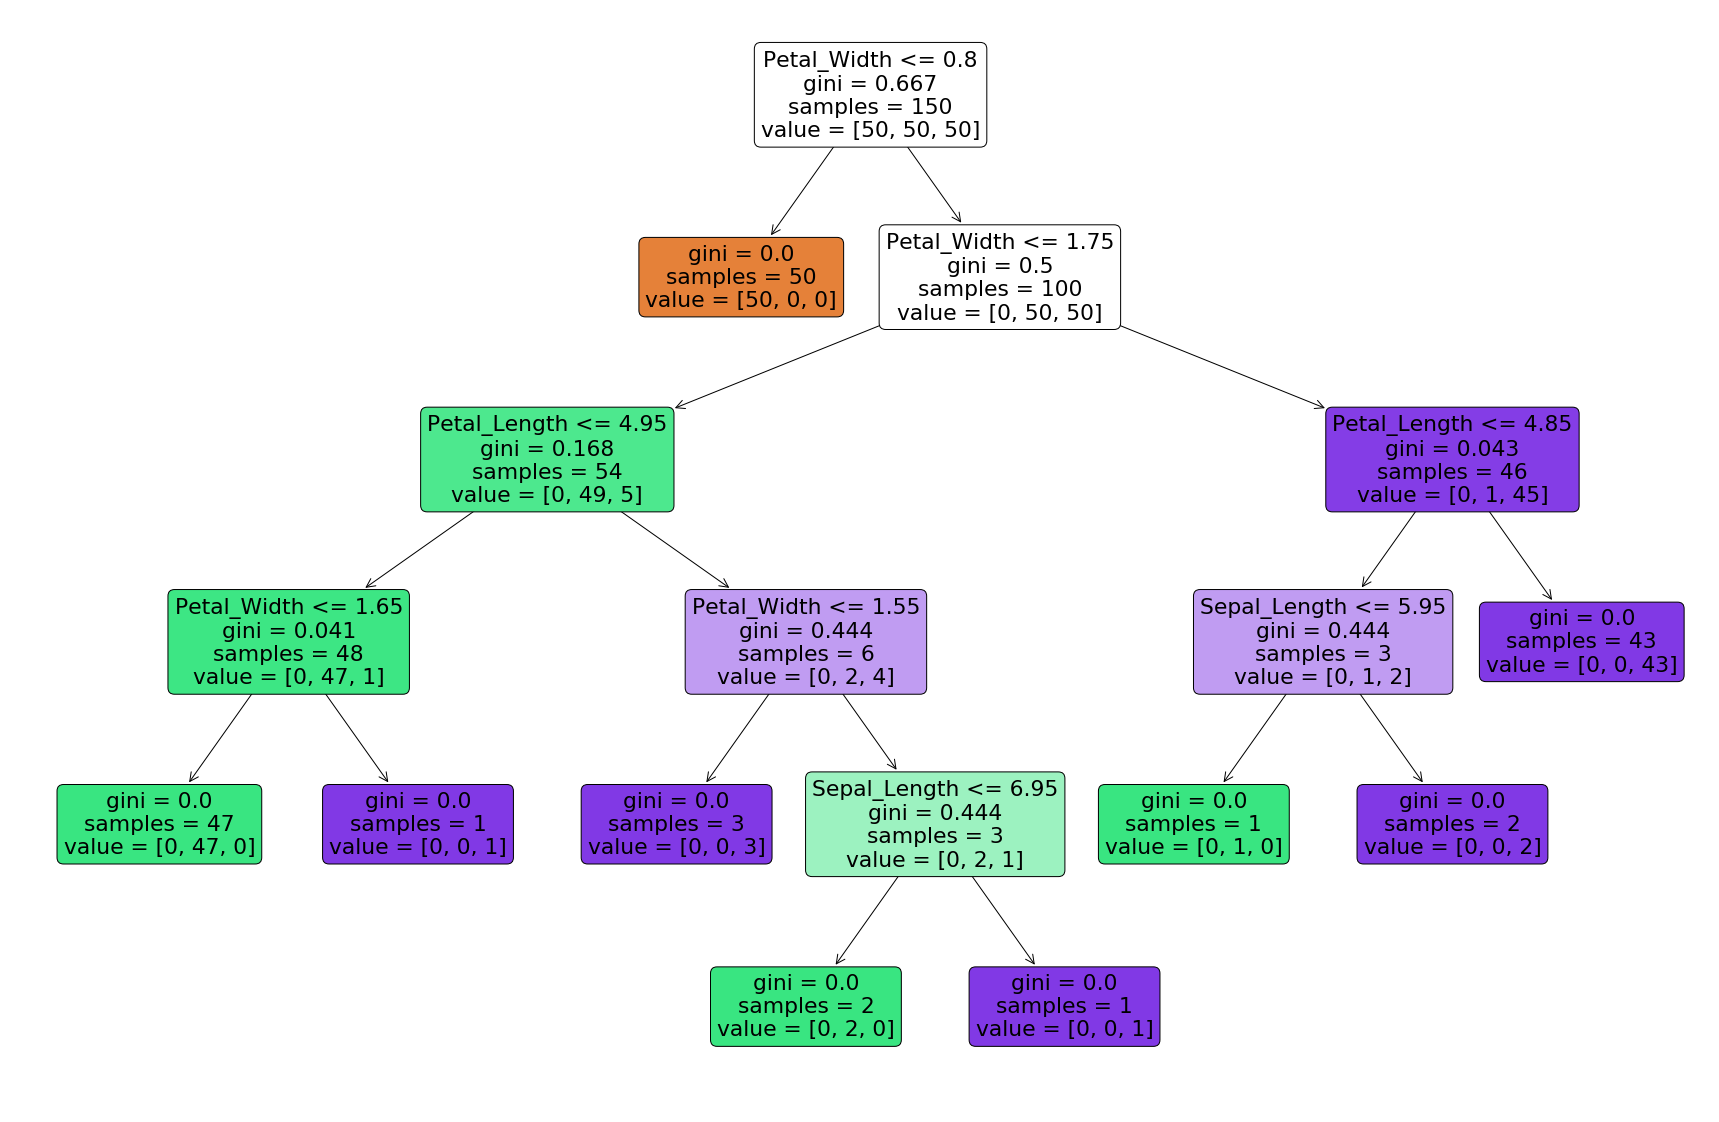

In [21]:
DT = model_DecisionTree.fit(X,Y)

plt.rcParams.update({
    "text.color": "black"})
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(DT, feature_names=X.columns, filled=True, rounded=True)